In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
print(tf.__version__)

2.2.0


In [46]:
mnist = tf.keras.datasets.fashion_mnist

In [47]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() 

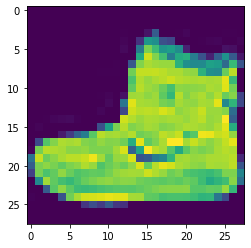

In [4]:
plt.imshow(training_images[0])

In [5]:
print(training_labels[0].shape)
print(training_images[0].shape)

()
(28, 28)


In [6]:
training_images = training_images / 255
test_images = test_images / 255

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

When the label is one column (0, 1, 2, 3, ..., 10) and the last layer is a 10 layer with a softmax you need to use
SPARSE categoical crossentropy as your loss function.

In [8]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [9]:
history = model.fit(training_images, training_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 2s 938us/step - loss: 0.5007 - accuracy: 0.8230
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3752 - accuracy: 0.8663
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3355 - accuracy: 0.8772
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3112 - accuracy: 0.8859
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2944 - accuracy: 0.8923
Epoch 6/50
1875/1875 [==============================] - 2s 961us/step - loss: 0.2810 - accuracy: 0.8961
Epoch 7/50
1875/1875 [==============================] - 2s 927us/step - loss: 0.2673 - accuracy: 0.9008
Epoch 8/50
1875/1875 [==============================] - 2s 975us/step - loss: 0.2581 - accuracy: 0.9035
Epoch 9/50
1875/1875 [==============================] - 2s 969us/step - loss: 0.2486 - accuracy: 0.9070
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - l

<AxesSubplot:>

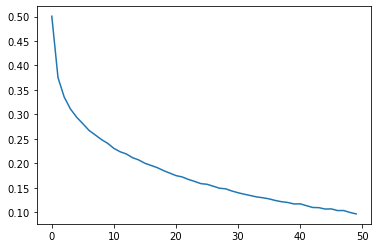

In [10]:
pd.DataFrame(history.history)["loss"].plot()

In [11]:
predictions = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 799us/step - loss: 0.4862 - accuracy: 0.8927


In [12]:
classifications = np.argmax(model.predict(test_images), axis=1)

In [13]:
classifications.shape

(10000,)

In [14]:
test_labels[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [15]:
tf.stack([classifications[:30], test_labels[0:30]],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int64, numpy=
array([[9, 9],
       [2, 2],
       [1, 1],
       [1, 1],
       [6, 6],
       [1, 1],
       [4, 4],
       [6, 6],
       [5, 5],
       [7, 7],
       [4, 4],
       [5, 5],
       [5, 7],
       [3, 3],
       [4, 4],
       [1, 1],
       [2, 2],
       [2, 4],
       [8, 8],
       [0, 0],
       [2, 2],
       [5, 5],
       [7, 7],
       [5, 9],
       [1, 1],
       [2, 4],
       [6, 6],
       [0, 0],
       [9, 9],
       [4, 3]], dtype=int64)>

In [17]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()
            
model.fit(training_images, training_labels, epochs=5, callbacks=[callback])

2.2.0
Epoch 1/5
1860/1875 [============================>.] - ETA: 0s - loss: 0.0998 - accuracy: 0.9626
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0996 - accuracy: 0.9627


## Improve NN use Convolutions

In [51]:
test_images.shape

(10000, 28, 28)

In [48]:
training_images.shape

(60000, 28, 28)

In [49]:
training_images[0][:3]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=uint8)

In order to use the convolutional layer you need to convert the input

In [52]:
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [53]:
training_images[0][:3]

array([[[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [55]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [56]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

In [58]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')<0.03):
            print("\nReached 97% accuracy so cancelling training!")
            self.model.stop_training = True

callback = myCallback()

history = model.fit(training_images, training_labels, epochs=50, callbacks=[callback])

2.2.0
Epoch 1/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3897 - accuracy: 0.8584
Epoch 2/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3214 - accuracy: 0.8809
Epoch 3/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2903 - accuracy: 0.8925
Epoch 4/50
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2678 - accuracy: 0.9007
Epoch 5/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2473 - accuracy: 0.9067
Epoch 6/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2283 - accuracy: 0.9144
Epoch 7/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2121 - accuracy: 0.9190
Epoch 8/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1972 - accuracy: 0.9262
Epoch 9/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1854 - accuracy: 0.9303
Epoch 10/50
1875/1875 [==============================] - 2

KeyboardInterrupt: 

In [59]:
predictions = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.8522 - accuracy: 0.8922


In [60]:
classifications = np.argmax(model.predict(test_images), axis=1)

In [61]:
tf.stack([classifications[:30], test_labels[0:30]],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int64, numpy=
array([[9, 9],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 6],
       [1, 1],
       [4, 4],
       [6, 6],
       [5, 5],
       [7, 7],
       [4, 4],
       [5, 5],
       [7, 7],
       [3, 3],
       [4, 4],
       [1, 1],
       [2, 2],
       [4, 4],
       [8, 8],
       [0, 0],
       [2, 2],
       [9, 5],
       [7, 7],
       [5, 9],
       [1, 1],
       [2, 4],
       [4, 6],
       [0, 0],
       [9, 9],
       [3, 3]], dtype=int64)>

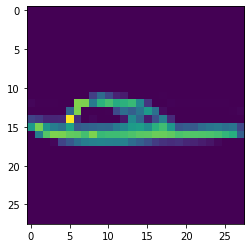

In [66]:
plt.imshow(training_images[30])

(1, 26, 26, 64)
(1, 13, 13, 64)
(1, 11, 11, 64)
(1, 5, 5, 64)


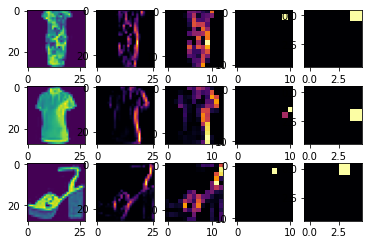

In [94]:
f, axarr = plt.subplots(3,5)

FIRST_IMAGE=100
SECOND_IMAGE=170
THIRD_IMAGE=240
CONVOLUTION_NUMBER = 60

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

axarr[0,0].imshow(test_images[FIRST_IMAGE])
axarr[1,0].imshow(test_images[SECOND_IMAGE])
axarr[2,0].imshow(test_images[THIRD_IMAGE])

for x in range(0, 4):
    
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    print(f1.shape)
    axarr[0,x+1].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno') # Get one specific convolution
    axarr[0,x+1].grid(False)
    
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x+1].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x+1].grid(False)
    
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x+1].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x+1].grid(False)

In [91]:
f1[0, : , :, 10]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [68]:
layer_outputs

[<tf.Tensor 'conv2d_12/Identity:0' shape=(None, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_11/Identity:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_13/Identity:0' shape=(None, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_12/Identity:0' shape=(None, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten_10/Identity:0' shape=(None, 1600) dtype=float32>,
 <tf.Tensor 'dense_20/Identity:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_21/Identity:0' shape=(None, 10) dtype=float32>]